# Homework 10: Model selection

This homework is designed to give you practice implementing model selection techniques, including best subset selection and forward/backward stepwise selection.

You won't need to load in any data for this homework, we will be simulating our own.

---
## 1. Best subset selection (4 points)

In this question, we will first generate simulated data, and then use it to perform best subset selection.

a) Use `rnorm()` to generate a dataset including a predictor $X$ of length $n = 100$ and a noise vector $\epsilon$ of length $n = 100$. Generate data for a response variable $Y$ of length $n = 100$ according to the model

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

where $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are constants of your choice.


In [9]:
sample_size = 100

beta0 = 5
beta1 = 0.5
beta2 = 2
beta3 = 4
e_sd = 0.25

set.seed(1738)

sim_data <- function(sample_size, beta0, beta1, beta2, beta3, e_sd) {
  epsilon <- rnorm(sample_size, sd=e_sd)
  x <- rnorm(sample_size)
  y <- (beta0 + beta1*x + beta2*x^2+beta3*x^3+epsilon)
  return(data.frame(x=x, y=y))
}
dat <- sim_data(sample_size, beta0, beta1, beta2, beta3, e_sd)
head(dat)

,x,y
,<dbl>,<dbl>
1,-0.1599112,4.779084
2,0.1477215,5.090774
3,-0.2234208,4.666511
4,-2.2137765,-29.493252
5,0.7205043,7.640941
6,-1.4578435,-4.309937


b) Use `regsubsets()` to perform best subset selection to determine the best model that contains the predictor variables $X$, $X^2$, . . . , $X^{10}$. Print the model summary.

For this you will need to install and load the _leaps_ library.

In [17]:
library(leaps)

regfit.full = regsubsets(y ~ poly(x, 10), data=dat)
reg.summary <- summary(regfit.full)
reg.summary

Subset selection object
Call: regsubsets.formula(y ~ poly(x, 10), data = dat)
10 Variables  (and intercept)
              Forced in Forced out
poly(x, 10)1      FALSE      FALSE
poly(x, 10)2      FALSE      FALSE
poly(x, 10)3      FALSE      FALSE
poly(x, 10)4      FALSE      FALSE
poly(x, 10)5      FALSE      FALSE
poly(x, 10)6      FALSE      FALSE
poly(x, 10)7      FALSE      FALSE
poly(x, 10)8      FALSE      FALSE
poly(x, 10)9      FALSE      FALSE
poly(x, 10)10     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         poly(x, 10)1 poly(x, 10)2 poly(x, 10)3 poly(x, 10)4 poly(x, 10)5
1  ( 1 ) "*"          " "          " "          " "          " "         
2  ( 1 ) "*"          " "          "*"          " "          " "         
3  ( 1 ) "*"          "*"          "*"          " "          " "         
4  ( 1 ) "*"          "*"          "*"          " "          " "         
5  ( 1 ) "*"          "*"          "*"          "*"          " "         


In [16]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

ERROR: Error in parse(text = x, srcfile = src): attempt to use zero-length variable name


c) Plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Which is the best model? Report the coefficients of the best model. 

[1] 6.36783


[1] 4

(Intercept) poly(x, 10)1 poly(x, 10)2 poly(x, 10)3 poly(x, 10)9 
   4.2708802   94.0360045   -7.6755074   59.7376522    0.3786894

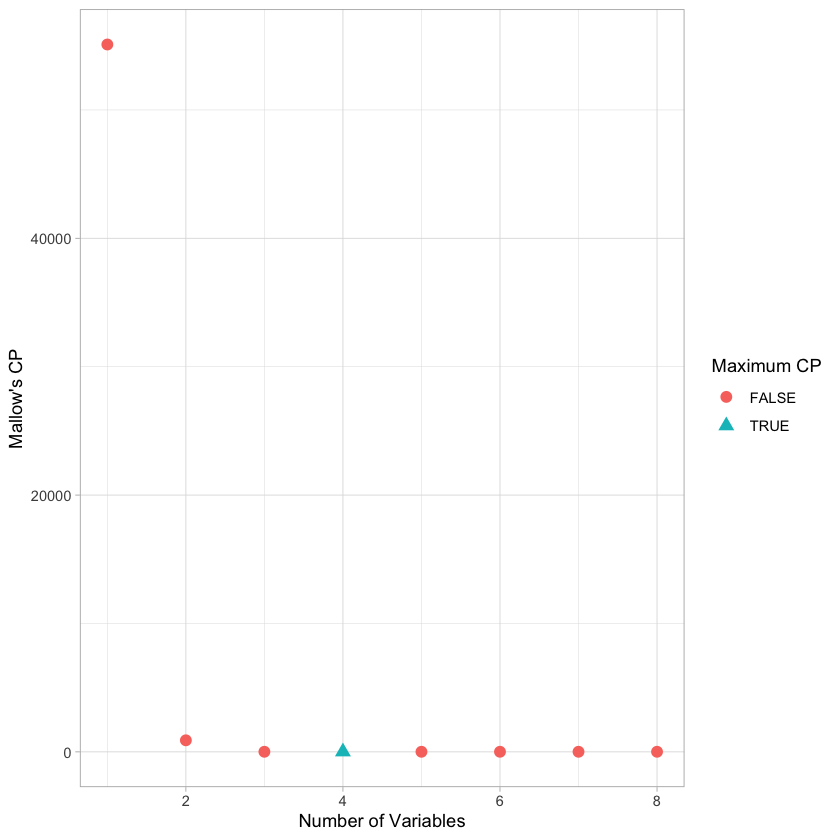

[1] -737.7428


[1] 3

(Intercept) poly(x, 10)1 poly(x, 10)2 poly(x, 10)3 
    4.270880    94.036005    -7.675507    59.737652

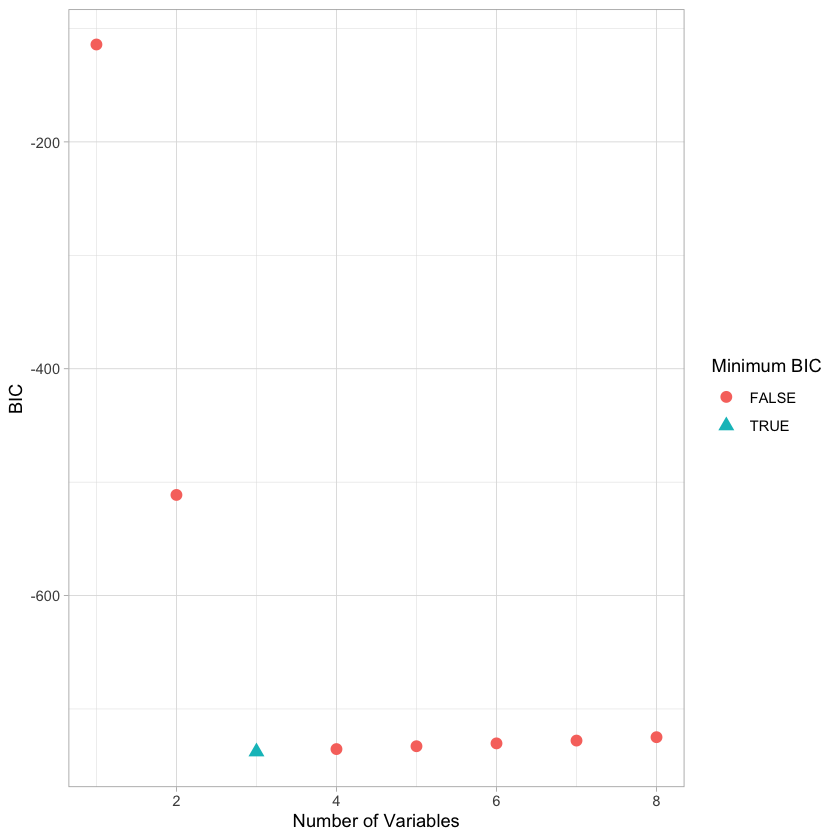

[1] 0.999489


[1] 8

(Intercept) poly(x, 10)1 poly(x, 10)2 poly(x, 10)3 poly(x, 10)4 poly(x, 10)5 
   4.2708802   94.0360045   -7.6755074   59.7376522    0.3623470   -0.3580796 
poly(x, 10)6 poly(x, 10)7 poly(x, 10)9 
  -0.3593392    0.3087274    0.3786894

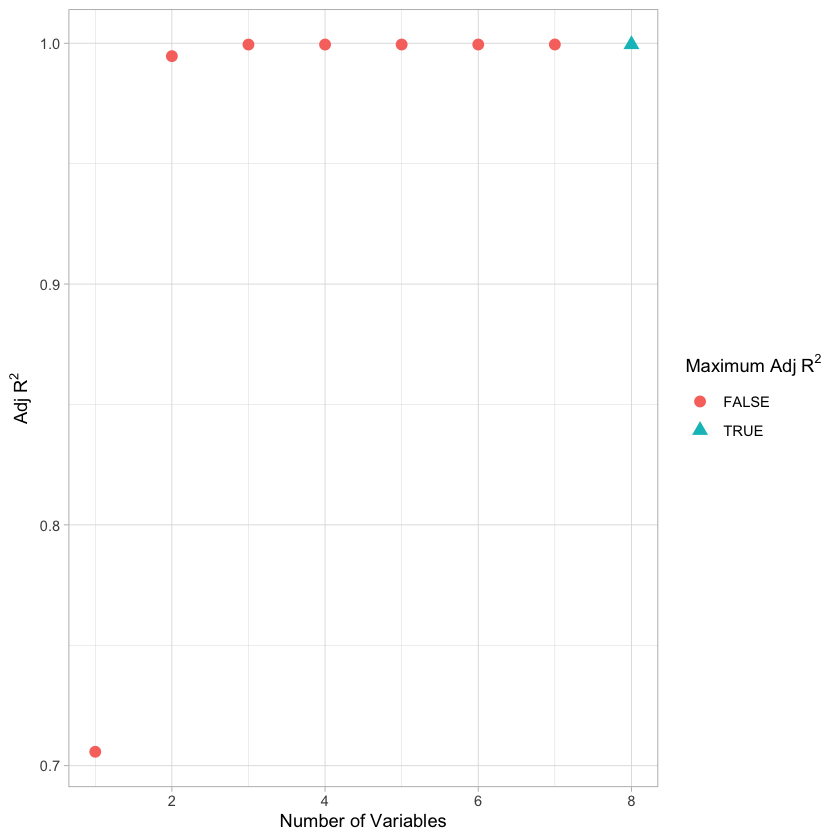

In [23]:
# Uncomment the model fit measures you want to look at.

library(ggplot2)

numvar = 1:length(reg.summary$rss)# Make a vector that lists the number of variables in sequence, from 1 to 19. 
allfalse = rep(FALSE,length(reg.summary$rss))# Starting point for an indicator that marks the best model choice for each metric.

# Mallows' Cp
cp.df <- data.frame(numvar = numvar, cp <- reg.summary$cp, mincp <- allfalse)
cp.df$mincp[which.min(reg.summary$cp)] <- TRUE
ggplot(cp.df,aes(x=numvar,y=cp, shape=mincp, col=mincp)) + 
     geom_point(size=3) + theme_light() + 
     labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

print(min(cp))
which.min(cp)
coef(regfit.full, which.min(cp))


# Bayesian Information Criteria (BIC) 
bic.df <- data.frame(numvar = numvar,bic <- reg.summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(reg.summary$bic)] <- TRUE
ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) + 
  geom_point(size=3) + theme_light() + 
  labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

print(min(bic))
which.min(bic)
coef(regfit.full, which.min(bic))

# adjusted coefficient of determination (adjr2)
adjr2.df <- data.frame(numvar = numvar, adjr2 <- reg.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(reg.summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
  geom_point(size=3) + theme_light() + 
  labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

print(max(adjr2))
which.max(adjr2)
coef(regfit.full, which.max(adjr2))

> The best model depends on which criteria is used. For instance, Mallow's CP and the BIC suggest that a 4 and 3 variable model are the best, respectively. On the other hand, the adjusted R^2 suggests that an 8 variable model is best. However, while the "true" symbol is on the number 8 for the adjusted for R^2, visually, a 3-8 variable model seem to have a similar (if not the same) adjusted R^2 value. As such the Mallow's CP and BIC may be more reliable in this case, and to be cautious, we will use the 4 variable model as recommended by the Mallow's CP:

>y = 4.27(x) + 94.03(x1) + -7.67(x2) + 59.73(x3) + 0.37(x9)

---
## 2. Forward and backwards stepwise selection (3 points)

Using the same simulated data from question 1, use forward stepwise selection, and backwards stepwise selections to determine the best model. Again, for both model selection methods, plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Report the coefficients of the best model. 

a) Forward stepwise selection:

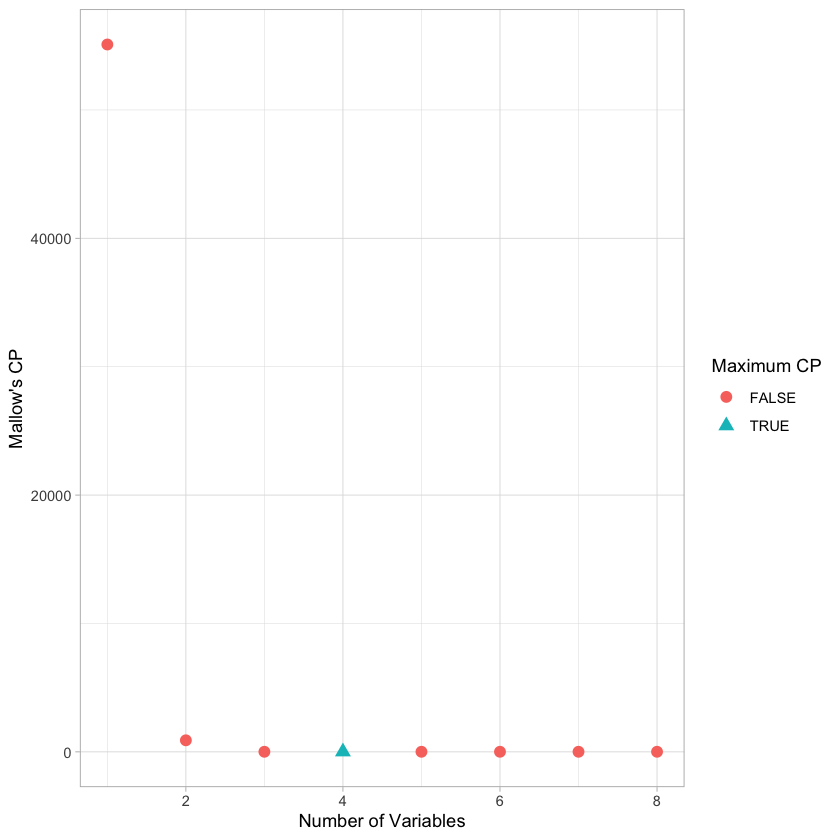

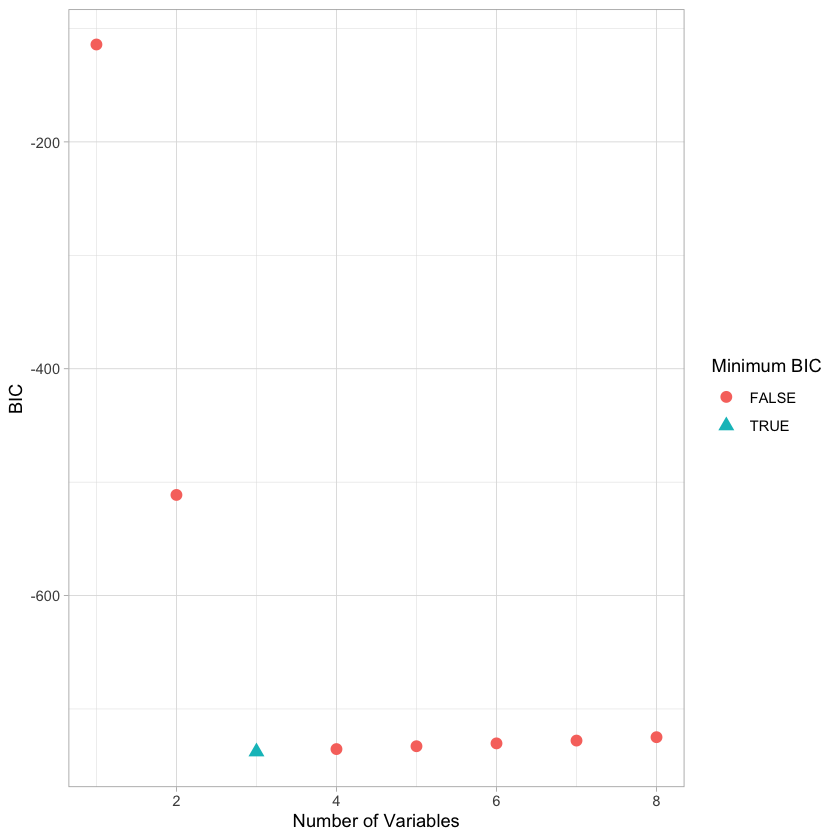

,(Intercept),"poly(x, 10)1","poly(x, 10)2","poly(x, 10)3","poly(x, 10)4","poly(x, 10)5","poly(x, 10)6","poly(x, 10)7","poly(x, 10)8","poly(x, 10)9","poly(x, 10)10"
1,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
3,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
4,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE
5,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE
6,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE
7,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE
8,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE


(Intercept) poly(x, 10)1 poly(x, 10)2 poly(x, 10)3 poly(x, 10)9 
   4.2708802   94.0360045   -7.6755074   59.7376522    0.3786894

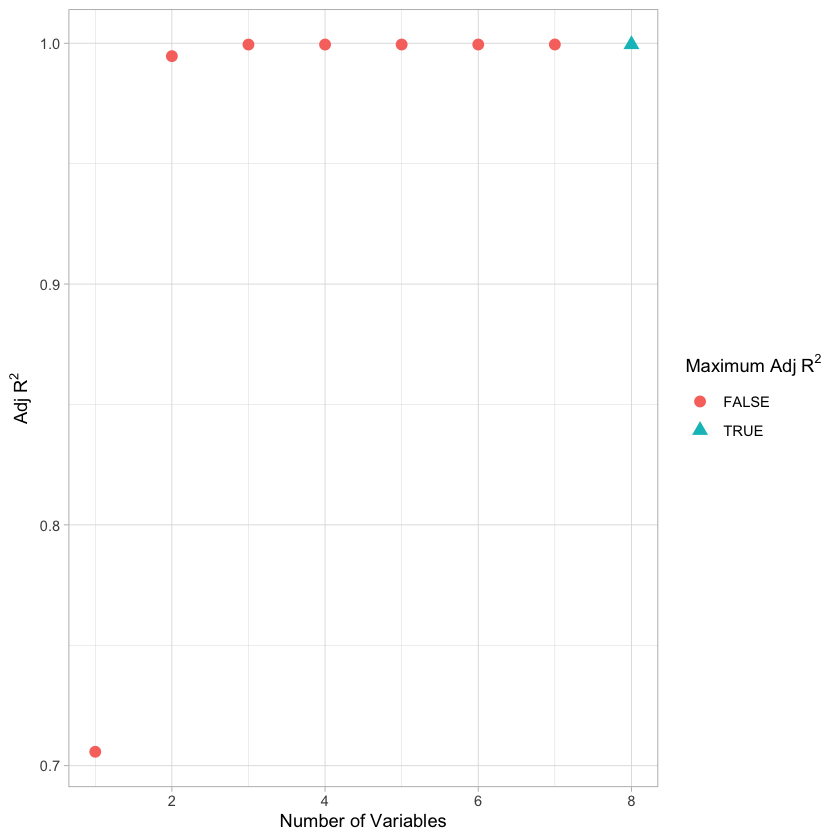

In [25]:
##Forward selection 

regfit_fwd <- regsubsets(y ~ poly(x, 10), data=dat, method = "forward")
regfit_fwdsum <- summary(regfit_fwd)
numvarF = 1:length(regfit_fwdsum$rss)
allfalse = rep(FALSE,length(regfit_fwdsum$rss))

## Mallows' Cp
cp.df <- data.frame(numvar = numvarF, cp <- regfit_fwdsum$cp, mincp <- allfalse)
cp.df$mincp[which.min(regfit_fwdsum$cp)] <- TRUE
ggplot(cp.df,aes(x=numvarF,y=cp,shape=mincp,col=mincp)) + 
  geom_point(size=3) + theme_light() + 
  labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

# Bayesian Information Criteria (BIC) 
bic.df <- data.frame(numvar = numvarF,bic <- regfit_fwdsum$bic, minbic <- allfalse)
bic.df$minbic[which.min(regfit_fwdsum$bic)] <- TRUE
ggplot(bic.df,aes(x=numvarF,y=bic,shape=minbic,col=minbic)) + 
  geom_point(size=3) + theme_light() + 
  labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

## adjusted coefficient of determination (adjr2)
adjr2.df <- data.frame(numvar = numvarF, adjr2 <- regfit_fwdsum$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(regfit_fwdsum$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvarF,y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
  geom_point(size=3) + theme_light() + 
  labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

# Coefficients of best model
regfit_fwdsum$which
coef(regfit_fwd, which.min(cp))

In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

b) Backwards stepwise selection:

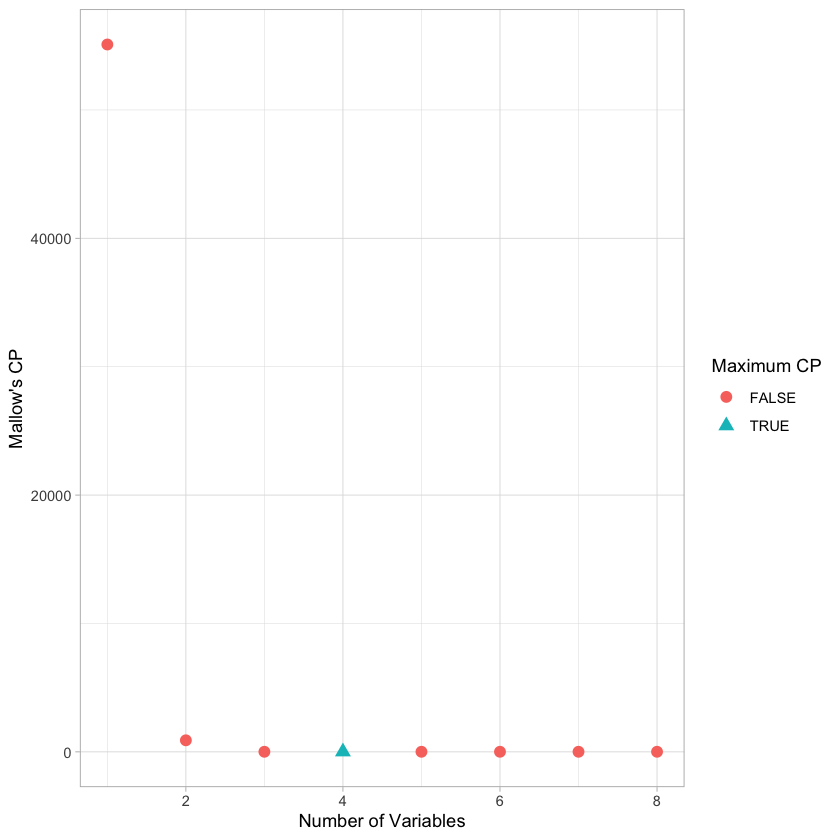

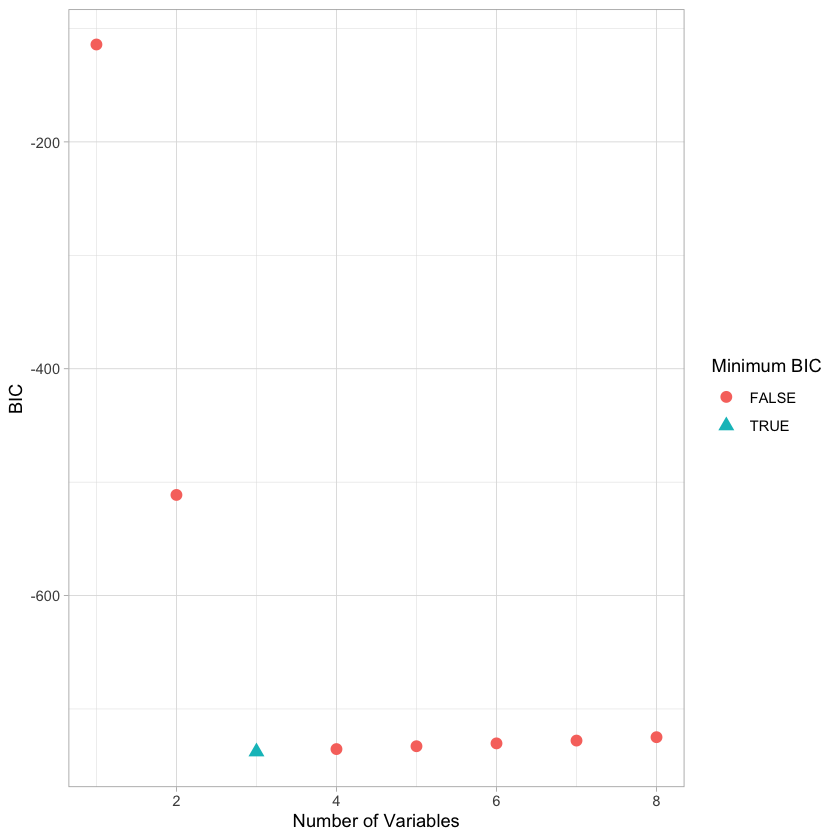

,(Intercept),"poly(x, 10)1","poly(x, 10)2","poly(x, 10)3","poly(x, 10)4","poly(x, 10)5","poly(x, 10)6","poly(x, 10)7","poly(x, 10)8","poly(x, 10)9","poly(x, 10)10"
1,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
3,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
4,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE
5,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE
6,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE
7,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE
8,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE


(Intercept) poly(x, 10)1 poly(x, 10)2 poly(x, 10)3 poly(x, 10)9 
   4.2708802   94.0360045   -7.6755074   59.7376522    0.3786894

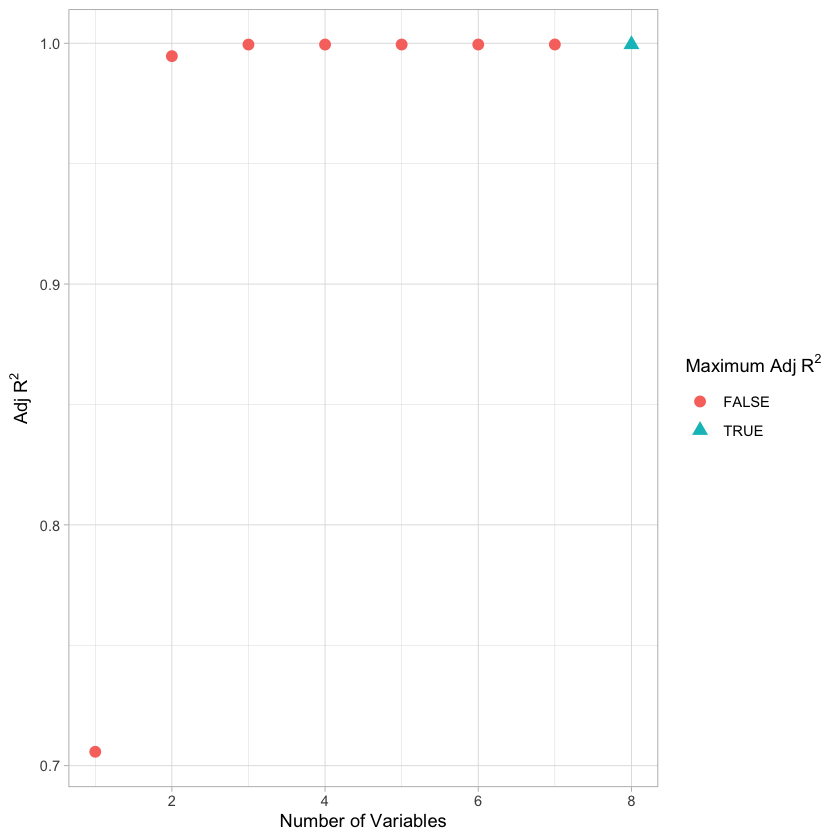

In [27]:
regfit_bwd <- regsubsets(y ~ poly(x, 10), data=dat, method = "backward")
regfit_bwdsum <- summary(regfit_bwd)
numvarB = 1:length(regfit_bwdsum$rss)
allfalse = rep(FALSE,length(regfit_bwdsum$rss))


#  Mallows' Cp
cp.df <- data.frame(numvar = numvarB, cp <- regfit_bwdsum$cp, mincp <- allfalse)
cp.df$mincp[which.min(regfit_bwdsum$cp)] <- TRUE
ggplot(cp.df,aes(x=numvarB,y=cp,shape=mincp,col=mincp)) + 
  geom_point(size=3) + theme_light() + 
  labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

#Bayesian Information Criteria (BIC) 
bic.df <- data.frame(numvar = numvarB,bic <- regfit_bwdsum$bic, minbic <- allfalse)
bic.df$minbic[which.min(regfit_bwdsum$bic)] <- TRUE
ggplot(bic.df,aes(x=numvarB,y=bic,shape=minbic,col=minbic)) + 
  geom_point(size=3) + theme_light() + 
  labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

## adjusted coefficient of determination (adjr2)
adjr2.df <- data.frame(numvar = numvarB, adjr2 <- regfit_bwdsum$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(regfit_bwdsum$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvarB,y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
  geom_point(size=3) + theme_light() + 
  labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

# Coefficients of best model
regfit_bwdsum$which
coef(regfit_bwd, which.min(cp))

In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

c) Compare your results from parts a and b with those of question 1.


I'm getting the same results for parts a and b of question 1..(mistake?) - which suggest a 3 or 4 variable model is best.  

---
## 3. Training and test error (3 points)

This question will explore the relationship between training and test error and the number of features included in a model. We will again use a simulated dataset. 

a) Simulate dataset with features $p = 20$ and observations $n = 1,000$. Generate data for a response variable $Y$ according to the model

$Y = X\beta + \epsilon$ 

where $\beta$ is random with some elements that are exactly zero.

Split your simulated dataset into a training set containing $n=100$ observations and a test set containing $n=900$ observations.

In [ ]:
samplesize = 1000
p = 20

#I couldn't figure out how to split the similuated dataset from the tutorials (may have overlooked), but I would l
#love to meet sometime to discuss and confirm cross vali

b) Perform best subset selection on the training set, and plot the associated training and test set MSE for the best model of each size.

In [ ]:
# WRITE YOUR CODE HERE



c) Identify the best model according the test MSE. How does this model compare to the actual model used to simulate the dataset?

*Note: If the model identified contains only an intercept or all of the features, then generate a new dataset (i.e. repeat part a with a different random seed) until the test set MSE is minimized for an intermediate model size.*

In [ ]:
# WRITE YOUR CODE HERE



> *Write your response here* 
> 

**DUE:** 5pm EST, April 15th, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*